<a href="https://colab.research.google.com/github/elangbijak4/Testing_-_Exploration_4_Quantum_Machine/blob/main/Rev2_Oracle_dengan_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  cirq

In [ ]:
!pip install cirq --upgrade  # Upgrade Cirq to the latest version

In [4]:
import cirq
import matplotlib.pyplot as plt

In [11]:
from cirq.contrib.svg import SVGCircuit  # Import the necessary module for drawing

In [16]:
from IPython.display import SVG, display  # Import display from IPython

In [35]:
def oracle_measurement_advanced(qubits):
    """
    Oracle yang mengukur nilai qubit pertama dan membalik nilai qubit kedua
    jika qubit pertama bernilai 1.
    """
    yield cirq.measure(qubits[0], key='measurement')
    # Use a different qubit as the control
    yield cirq.CNOT(qubits[1], qubits[2]).controlled_by(qubits[0])

# Uji coba
qubits = cirq.LineQubit.range(3)
circuit_measurement_advanced = cirq.Circuit(oracle_measurement_advanced(qubits))
print(circuit_measurement_advanced)
#circuit_measurement_advanced.draw(figsize=(5, 3))
#plt.show()

simulator = cirq.Simulator()
result_measurement_advanced = simulator.simulate(circuit_measurement_advanced)
print(result_measurement_advanced)

#histogram = result_measurement_advanced.histogram(key='measurement')
#plt.bar(histogram.keys(), histogram.values())
#plt.xlabel("Measurement Result")
#plt.ylabel("Probability")
#plt.title("Probabilitas Measurement")
#plt.show()

0: ───M('measurement')───@───
                         │
1: ──────────────────────@───
                         │
2: ──────────────────────X───
measurements: measurement=0

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: |000⟩

phase:
output vector: |⟩


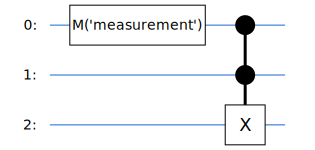

In [36]:
# Use SVGCircuit to draw the circuit
svg_circuit = cirq.contrib.svg.SVGCircuit(circuit_measurement_advanced)

# Get the SVG content as a string (using _repr_svg_)
svg_string = svg_circuit._repr_svg_()

# Display the SVG in the notebook
display(SVG(svg_string))

Penambahan measurement pada setiap line sirkuit

0: ───M('measurement_qubit_0')───@──────────────────────────────
                                 │
1: ──────────────────────────────@───M('measurement_qubit_1')───
                                 │
2: ──────────────────────────────X───M('measurement_qubit_2')───

3: ───M('measurement_qubit_3')──────────────────────────────────

4: ───M('measurement_qubit_4')──────────────────────────────────


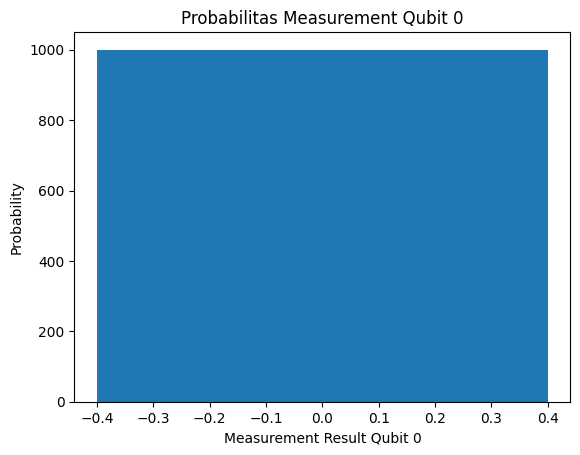

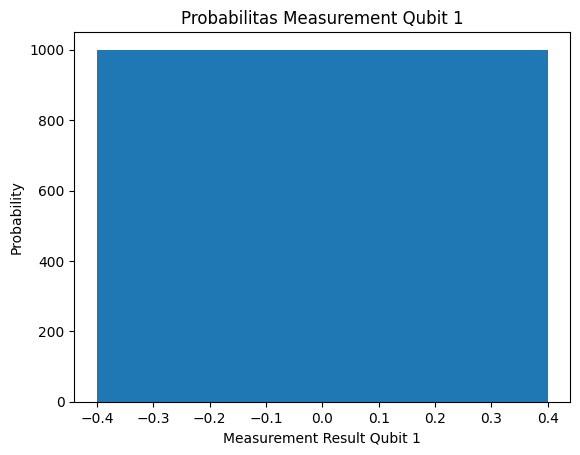

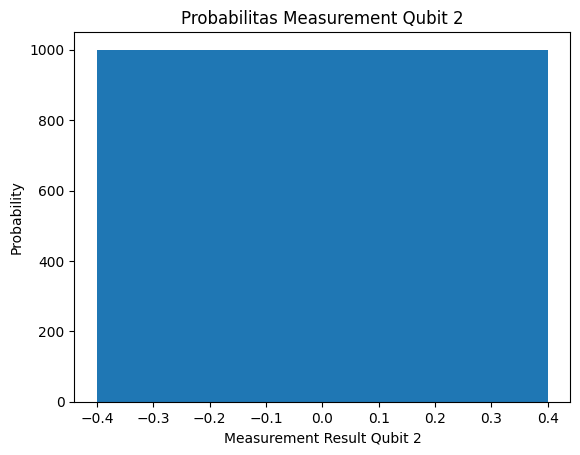

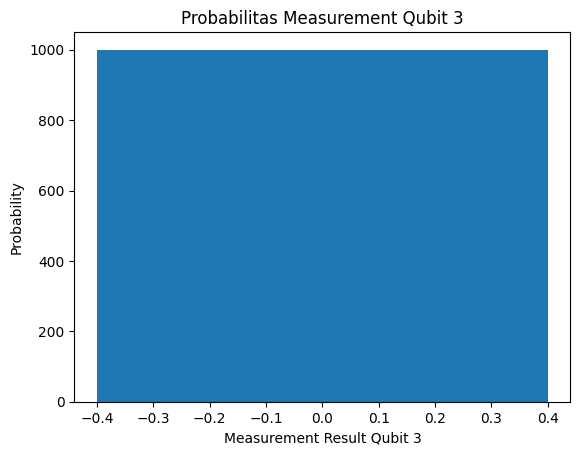

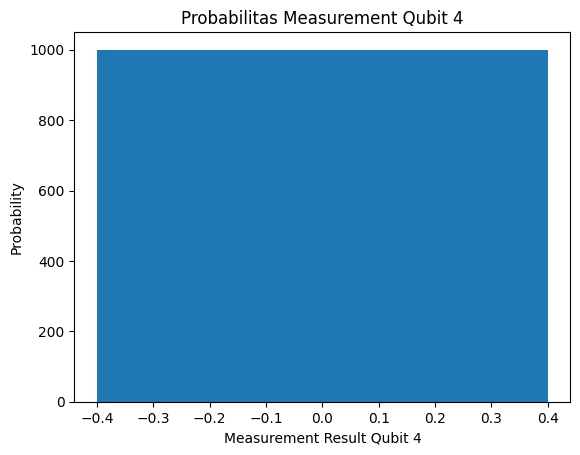

In [40]:
def oracle_measurement_advanced_with_line_measurements(qubits):
    """
    Oracle yang mengukur nilai qubit pertama dan membalik nilai qubit kedua
    jika qubit pertama bernilai 1.
    """
    yield cirq.measure(qubits[0], key='measurement_qubit_0') # Add measurement key for qubit 0
    # Use a different qubit as the control
    yield cirq.CNOT(qubits[1], qubits[2]).controlled_by(qubits[0])
    # Add measurements for other qubits
    for i in range(1, len(qubits)):
        yield cirq.measure(qubits[i], key=f'measurement_qubit_{i}')

# Uji coba
qubits = cirq.LineQubit.range(5)
circuit_measurement_advanced_with_line_measurements = cirq.Circuit(oracle_measurement_advanced_with_line_measurements(qubits))
print(circuit_measurement_advanced_with_line_measurements)

simulator = cirq.Simulator()
# Run the simulation with repetitions to get a TrialResult object
result_measurement_advanced_with_line_measurements = simulator.run(circuit_measurement_advanced_with_line_measurements, repetitions=1000)
#print(result_measurement_advanced_with_line_measurements)

for i in range(len(qubits)): # Iterate over all qubits
    histogram = result_measurement_advanced_with_line_measurements.histogram(key=f'measurement_qubit_{i}')
    plt.bar(histogram.keys(), histogram.values())
    plt.xlabel(f"Measurement Result Qubit {i}")
    plt.ylabel("Probability")
    plt.title(f"Probabilitas Measurement Qubit {i}")
    plt.show()

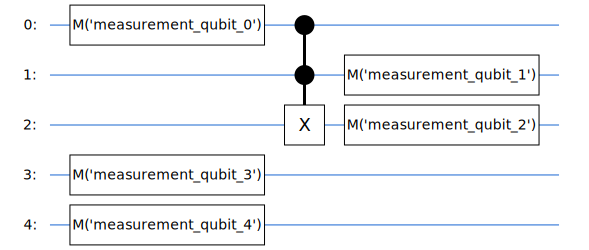

In [42]:
# Use SVGCircuit to draw the circuit
svg_circuit = cirq.contrib.svg.SVGCircuit(circuit_measurement_advanced_with_line_measurements)

# Get the SVG content as a string (using _repr_svg_)
svg_string = svg_circuit._repr_svg_()

# Display the SVG in the notebook
display(SVG(svg_string))